# REPORT_HW1

### 1: [10pt]

Allowed libraries: pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

(a) Report the percentage of the missing data and write your own code to remove the observations with missing values '?'.

(b) Next, plot the distribution of the # make of a car (for instance 'ford' is a make of a car), by processing the information provided under the 'car_name' attribute. For instance, 'chevrolet chevelle malibu' is a 'chevrolet' and you can write code to create a bar plot and show the count of observations for each make of a car such as 'ford', 'volkswagon', etc.

Percentage of the missing data: 1.51%


<AxesSubplot:>

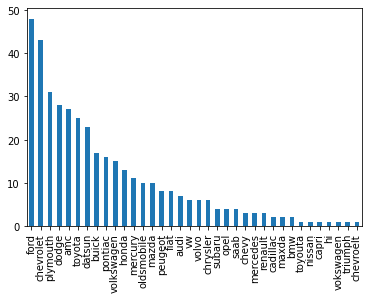

In [475]:
import pandas as pd

# read the saved dataset into pandas dataframe
df = pd.read_csv('./datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

# (a)
# total number of rows
totalRows = df.shape[0]

# number of rows with missing data ('?')
missingRows = df[df.isin(['?']).any(axis=1)].shape[0]

# report the percentage of the missing data
print("Percentage of the missing data: {:2.2%}".format(missingRows/totalRows))

# remove the observations with missing values '?' and update inices
df.drop(df[df.isin(['?']).any(axis=1)].index, inplace = True)
df = df.reset_index()
del df['index']

# (b)
# create a new DF which consists of one column with the extracted car makes
makes = pd.Series(df['car_name']).str.extract(r'(^\w+)', expand = True)

# update column name
makes.columns = ['car_make']

# get the bar plot
makes['car_make'].value_counts().plot(kind = 'bar')


### 2: [10pt]

Allowed libraries: pandas

(a) Lets assume that the goal is to classify the cars into 3 categories based on the weight attribute: light, medium, and heavy. Discover the threshold for each category, so that all samples are divided into three equally-sized bins.

(b) Next, plot a histogram to show the count of observations in each bin.

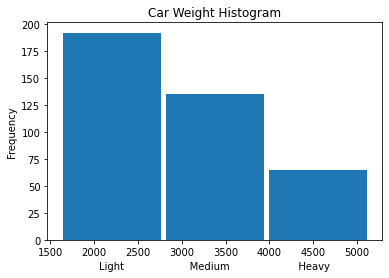

In [476]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt 

# read the saved dataset into pandas dataframe
df = pd.read_csv('./datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

# remove the observations with missing values '?' and update inices
df.drop(df[df.isin(['?']).any(axis=1)].index, inplace = True)
df = df.reset_index()
del df['index']

# (a)
# we need to determine the range for each bin so they are equaly sized(all(3) the bins should have equal width)
# Equal Width Binning : bins have equal width with a range of each bin are defined as [min + w], [min + 2w] …. [min + nw] where w = (max – min) / (no of bins).
maxW = max(df['weight'])
minW = min(df['weight'])
width = (maxW - minW) / 3

# now the ranges for the weight classification are
lightMin = minW
lightMax = lightMin + math.floor(width)
mediumMin = lightMin + math.ceil(width)
mediumMax = mediumMin + math.floor(width)
heavyMin = mediumMin + math.ceil(width)
heavyMax = heavyMin + math.floor(width)

# set up the conditions
conditions = [
    ( df['weight'] >= lightMin ) & ( df['weight'] <= lightMax ),
    ( df['weight'] >= mediumMin ) & ( df['weight'] <= mediumMax ),
    ( df['weight'] >= heavyMin ) & ( df['weight'] <= heavyMax ),
]

# initialize a value for each condition
values = ['light', 'medium', 'heavy']

# create new column with conditioned values
df['weight_class'] = np.select(conditions, values)

# (b)
# apparently, did not need all these  calculations if the goal was to plot 3 equaly sized bins
plt.hist(df['weight'], bins=3, rwidth=0.95)
plt.ylabel('Frequency')
plt.xlabel('Light                     Medium                      Heavy')
plt.title('Car Weight Histogram')
plt.show()


### 3: [10pt]

Allowed libraries: pandas, seaborn

(a) Create a 2D correlation matrix plot, similar to this example (https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07 and use seaborn library. You may use any published code to perform this.

(b) Describe the correlations between any two pairs of attributes in the dataset and why it does or does not match your expectation. (i.e., positive or negative correlation)


<AxesSubplot:>

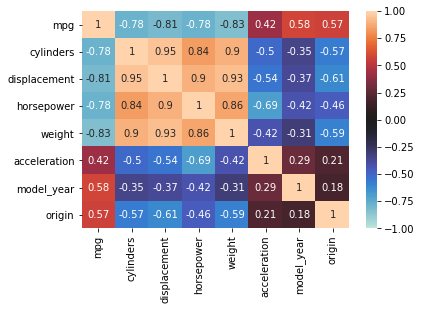

In [477]:
import seaborn as sns
import pandas as pd

# read the saved dataset into pandas dataframe
df = pd.read_csv('./datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

# remove the observations with missing values '?' and update inices
df.drop(df[df.isin(['?']).any(axis=1)].index, inplace = True)
df = df.reset_index()
del df['index']

# change the datatype of the column "horsepower"
df['horsepower'] = df['horsepower'].astype('float64')

# (a)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center = 0)

# (b)
# First pair is number of cylinders and displacement of a car. It matches my expectations because the greater dicplacement of the engine the greater number of cylinders.
# Second pair is displacement and mpg. It is a negative correlation. The bigger displacement an engine has the more gas it burns and the greater gas consumption is. Respectively, the mpg value is less. 


## (b)
    First pair is number of cylinders and displacement of a car. It matches my expectations because the greater dicplacement of the engine the greater number of cylinders.
    Second pair is displacement and mpg. It is a negative correlation. The bigger displacement an engine has the more gas it burns and the greater gas consumption is. Respectively, the mpg value is less. 

### 4: [20pt]

Allowed libraries: pandas, numpy

(a) Write a linear regression solver that can accommodate polynomial basis functions on a single variable for prediction of weight. Your code should use the Ordinary Least Squares (OLS) estimator (i.e. the Maximum-likelihood estimator). Code this from scratch. Its recommended to use a library (e.g. numpy) for basic linear algebra operations (addition,multiplication and inverse).

Prediction:  [3727.669 1951.721 2048.268 2790.083 3051.405 2681.831 2986.08  2923.104
 3567.028 3449.26  3667.088 3334.887 3586.923 3869.501 3153.691 3279.208
 1935.901 1871.234 1850.413 2181.46  2343.276 2594.57  2195.987 2492.066
 1869.251 1863.833 1939.744 1854.062 2113.776 2088.906 2226.087 1884.946
 1967.368 1865.23  1928.44  1853.099 2139.883 2257.633 2449.812 3171.226
 1867.356 2031.95  1960.075 1851.467 1924.823 1967.052 2146.608 1941.676
 2043.978 2029.486 1848.925 2021.432 2044.853 1877.705 2031.95  1907.895
 2513.939 1856.611 1917.819 2195.987 2241.675 2307.811 2536.322 2021.432
 1887.402 1884.804 1855.443 1921.283 1851.467 1858.883 1871.234 1860.67
 1865.55  2026.655 1898.681 1880.034 1917.819 1901.673 1947.655 2133.238
 1986.882 2343.276 2460.192 2668.946 2241.675 2986.08  3449.26  2139.883
 2210.861 1873.304 1973.152 2076.925 2210.861 2481.318 1849.192 1851.467
 1973.152 1863.503 1849.192 1849.192 1849.192 1873.304 1863.503 1932.133
 1863.503 2380.441 1863.503 2290.692 27

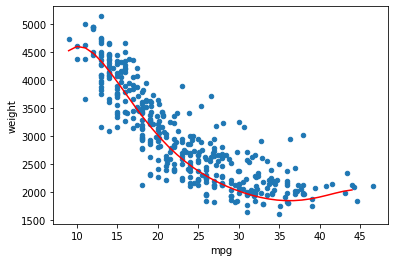

In [478]:
import pandas as pd
import numpy as np
import math 

# read the saved dataset into pandas dataframe
df = pd.read_csv('./datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

# remove the observations with missing values '?' and update inices
df.drop(df[df.isin(['?']).any(axis=1)].index, inplace = True)
df = df.reset_index()
del df['index']

# change the datatype of the column "horsepower"
df['horsepower'] = df['horsepower'].astype('float64')

# Linear Regression class
class LinearRegression:

    # pass the dataframe in the constructor
    def __init__(self, df):
        self.b = []
        self.df = df

    # this function fits a polynomial until the needed order
    def fit(self, x_in, y_in, order):
        
        x = np.array(self.df[x_in][:math.ceil(self.df.shape[0]*0.7)])
        y = np.array(self.df[y_in][:math.ceil(self.df.shape[0]*0.7)])
        X = np.c_[np.ones(len(x))]
        
        for i in range(1, order+1):
            X = np.c_[X, np.power(x, i)]
        
        # OLS
        self.b = np.linalg.inv(X.T@X)@(X.T@y)

        # visualize the data
        fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
        fy = self.b[0]
        for i in range(1, order+1):
            fy += self.b[i] * np.power(fx, i) 

        ax = self.df.plot.scatter(x=x_in, y=y_in)
        ax.plot(fx, fy, 'r')

        # predict function uses the test portion of the data and outputs the results and the error
    def predict(self, x_in, y_in, order):
        x_test = np.array(df[x_in][math.ceil(self.df.shape[0]*0.7):])
        y_test = np.array(df[y_in][math.ceil(self.df.shape[0]*0.7):])
        pred = np.empty(x_test.size)
        for i in range(x_test.size):
            pred_temp = self.b[0]
            for j in range(1, order+1):
                pred_temp += self.b[j] * np.power(x_test[i], j)
            pred[i] = pred_temp

        # MSE
        mse = (y_test - pred) ** 2

        # format numpy array values
        np.set_printoptions(precision=3)
        np.set_printoptions(suppress=True)

        print("Prediction: ", pred)  
        print("Actual: ", y_test) 
        print("MSE: ", mse)


lr = LinearRegression(df)
lr.fit('mpg', 'weight', 6)
lr.predict('mpg', 'weight', 6)